In [1]:
%matplotlib inline

Compute Moran\'s I score
========================

This example shows how to compute the Moran\'s I global spatial
auto-correlation statistics.

The Moran\'s I global spatial auto-correlation statistics evaluates
whether features (i.e. genes) shows a pattern that is clustered,
dispersed or random in the tissue are under consideration.

::: {seealso}
-   See {doc}`compute_co_occurrence` and
    {doc}`compute_ripley` for other scores to
    describe spatial patterns.
-   See {doc}`compute_spatial_neighbors` for
    general usage of {func}`squidpy.gr.spatial_neighbors`.
    
:::


In [3]:
import squidpy as sq

adata = sq.datasets.visium_hne_adata()
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We can compute the Moran\'s I score with `squidpy.gr.spatial_autocorr`
and `mode = 'moran'`. We first need to compute a spatial graph with
`squidpy.gr.spatial_neighbors`. We will also subset the number of genes
to evaluate.


In [4]:
genes = adata[:, adata.var.highly_variable].var_names.values[:100]
sq.gr.spatial_neighbors(adata)
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
adata.uns["moranI"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
3110035E14Rik,0.665132,0.0,0.000131,0.0,0.009901,0.000247,0.0,0.0,0.012074
Resp18,0.649582,0.0,0.000131,0.0,0.009901,0.000259,0.0,0.0,0.012074
1500015O10Rik,0.605940,0.0,0.000131,0.0,0.009901,0.000184,0.0,0.0,0.012074
Ecel1,0.570304,0.0,0.000131,0.0,0.009901,0.000222,0.0,0.0,0.012074
2010300C02Rik,0.539469,0.0,0.000131,0.0,0.009901,0.000242,0.0,0.0,0.012074
Scg2,0.476060,0.0,0.000131,0.0,0.009901,0.000174,0.0,0.0,0.012074
Ogfrl1,0.457945,0.0,0.000131,0.0,0.009901,0.000198,0.0,0.0,0.012074
Itm2c,0.451842,0.0,0.000131,0.0,0.009901,0.000178,0.0,0.0,0.012074
Tuba4a,0.451810,0.0,0.000131,0.0,0.009901,0.000189,0.0,0.0,0.012074
Satb2,0.429162,0.0,0.000131,0.0,0.009901,0.000200,0.0,0.0,0.012074


We can visualize some of those genes with `squidpy.pl.spatial_scatter`.


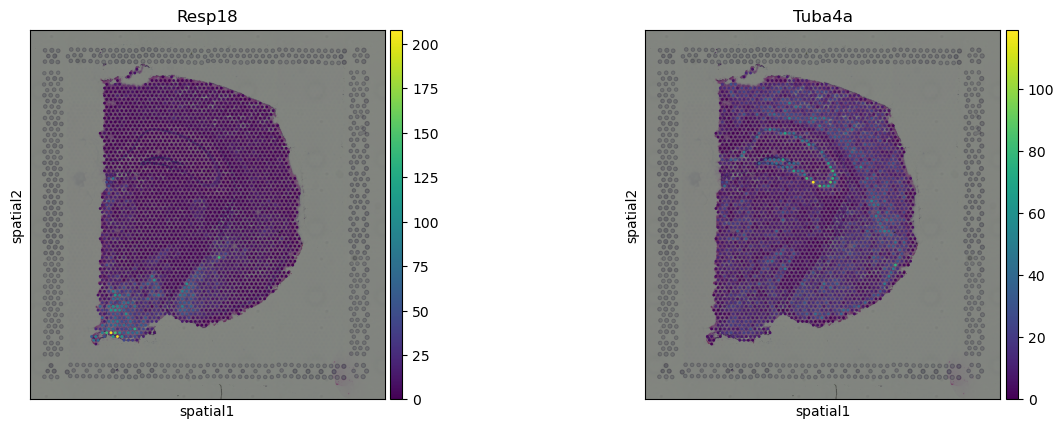

In [5]:
sq.pl.spatial_scatter(adata, color=["Resp18", "Tuba4a"])

We could\'ve also passed `mode = 'geary'` to compute a closely related
auto-correlation statistic, [Geary\'s
C](https://en.wikipedia.org/wiki/Geary%27s_C). See
`squidpy.gr.spatial_autocorr` for more information.
